<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbours

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq as hq
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [ ]:
data = np.random.random((100,3))
data[:50, 2] =0
data[50:,2 ] = 1
np.random.shuffle(data[:])

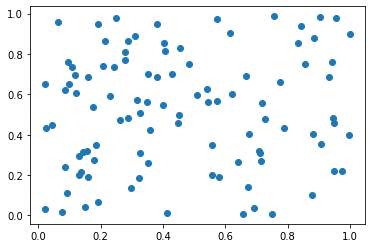

In [ ]:
plt.scatter(data[:,0],data[:,1])

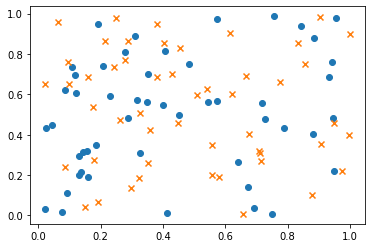

In [ ]:
caret = ['o','x']
# plt.subplots(figsize= (10,10))
for i in range(2):
  temp = data[data[:,2] == i]
  plt.scatter(temp[: ,0], temp[:, 1], marker=caret[i])

### Euclidean
$$
P = (x_0,x_1,x_2 .. x_{n-1})
$$


$$
d(p^{[0]},p^{[1]}) = \sqrt{\sum_{i=0}^{n-1}(x_0^{[0]}-x_i^{[1]})^2}
$$

In [10]:
def euclidean(p0, p1):
   d = 0
   n = len(p0)
   for i in range(n):
     d += (p0[i] - p1[i])**2
   return math.sqrt(d)

### Manhattan
$$
P = (x_0,x_1,x_2 .. x_{n-1})
$$


$$
d(p^{[0]},p^{[1]}) = {\sum_{i=0}^{n-1}\| x_0^{[0]}-x_i^{[1]}|}
$$

In [11]:
def manhattan(p0, p1):
   d = 0
   n = len(p0)
   for i in range(n):
     d += abs(p0[i] - p1[i])
   return d

In [12]:
euclidean([1,1], [2,2])

1.4142135623730951

In [13]:
manhattan([1,1], [2,2])

2

# Cosine similarity

In [14]:
def cosinesim(p0, p1):
   d = 0
   n = len(p0)
   for i in range(n):
     d += p0[i]*p1[i]
   #print(d)
   p00 = po(p0)
   p11 = po(p1)
   #print(p00,p11)

   return d/(p00*p11)

def po(p):
  d = 0
  n = len(p)
  for i in range(n):
    d += p[i]**2
  return math.sqrt(d)

In [15]:
cosinesim([1,1], [2,2])

0.9999999999999998

In [16]:
class knn:
    def __init__(self):
        pass

    def fit(self, x, y, k=3, dist=euclidean):
        self.x = x
        self.y = y
        self.dist = dist
        self.k = k

    def predictOne(self, xj):
        nb = []
        for i, xi in enumerate(self.x):
            hq.heappush(nb, (self.dist(xi, xj), i))

        y_hat = []
        for _ in range(self.k):
            _, i = hq.heappop(nb)
            y_hat.append(self.y[i][0])

        c = Counter(y_hat)
        return c.most_common()[0][0]

    def predict(self, x0):
        y_hat = []
        for xi in x0:
            y_hat.append(self.predictOne(xi))
        return y_hat

In [ ]:
train_size = 0.6
X = data[:, :2]
Y = data[:, 2:]

print(X.shape)
print(Y.shape)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=train_size)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(60, 2) (60, 1)
(40, 2) (40, 1)


In [ ]:
model = knn()

model.fit(x_train, y_train, k=5, dist=manhattan)

In [ ]:
y_hat = model.predict(x_val)

In [ ]:
accuracy_score(y_hat, y_val.reshape(len(y_val)))

0.425

In [ ]:
skmodel = KNeighborsClassifier(n_neighbors=5)
skmodel.fit(x_train, y_train)
y_hat = skmodel.predict(x_val)

accuracy_score(y_hat, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.4

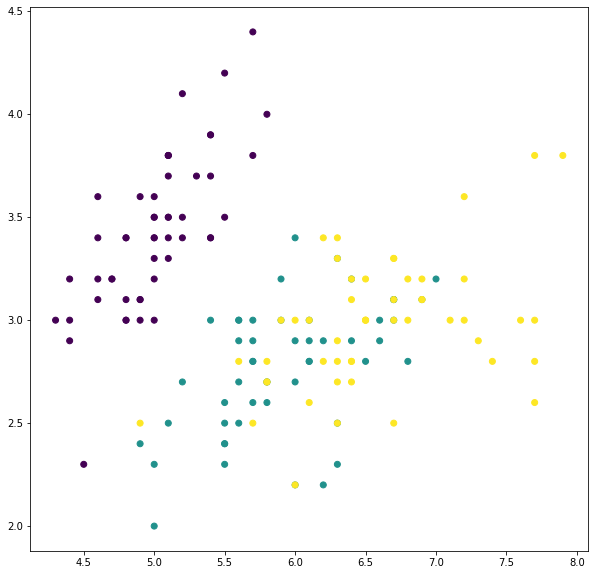

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target

plt.subplots(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [22]:
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=train_size)
y_train = y_train.reshape(len(y_train), 1)
y_val = y_val.reshape(len(y_val), 1)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(90, 4) (90, 1)
(60, 4) (60, 1)


In [25]:
model = knn()

model.fit(x_train, y_train, k=5, dist=euclidean)
y_hat = model.predict(x_val)
accuracy_score(y_hat, y_val.reshape(len(y_val)))

0.9833333333333333

In [24]:
skmodel = KNeighborsClassifier(n_neighbors=5)
skmodel.fit(x_train, y_train)
y_hat = skmodel.predict(x_val)

accuracy_score(y_hat, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9833333333333333

In [26]:
%timeit skmodel.predict(x_val)

2.18 ms ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%timeit model.predict(x_val)

22.3 ms ± 7.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
